In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/home/dacg/ALL_PROJECTS/House_price_prediction/data/Housing.csv")

In [3]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
df.shape

(545, 13)

<Axes: xlabel='bedrooms', ylabel='count'>

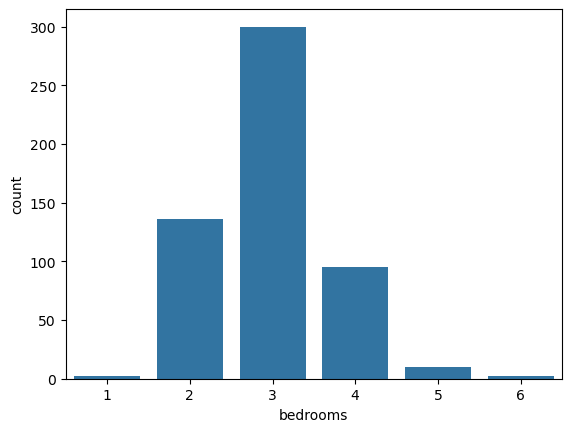

In [5]:
sns.countplot(x=df['bedrooms'])

In [6]:
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: ylabel='price'>

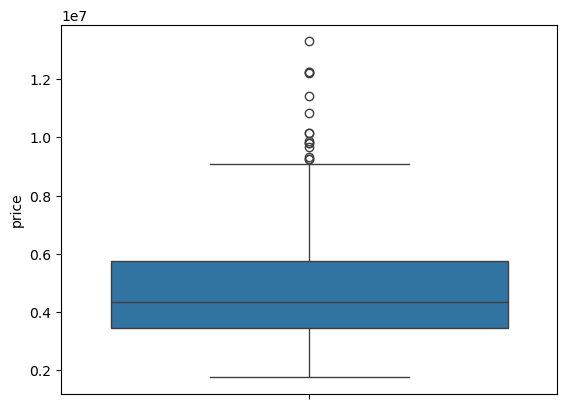

In [8]:
sns.boxplot(df['price'])

<Axes: ylabel='area'>

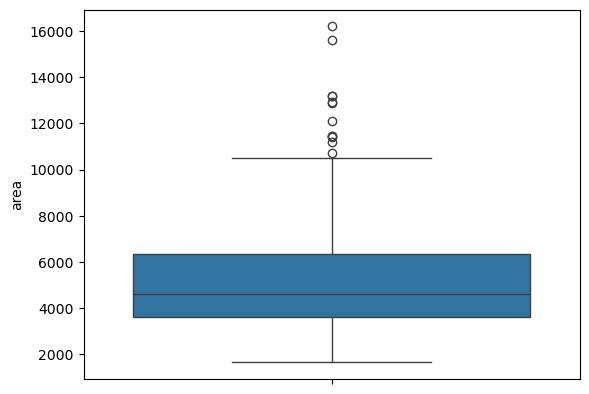

In [9]:
sns.boxplot(df['area'])

In [10]:
def outliers(X):
    Q1=np.quantile(X,0.25)
    Q3=np.quantile(X,0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return X.clip(lower=lower_bound,upper=upper_bound)

In [11]:
df['area']=outliers(df["area"])

<Axes: ylabel='area'>

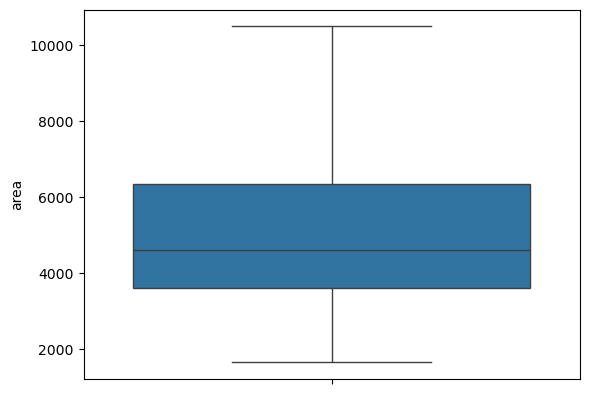

In [12]:
sns.boxplot((df['area']))

In [13]:
df['price']=outliers(df["price"])

<Axes: ylabel='price'>

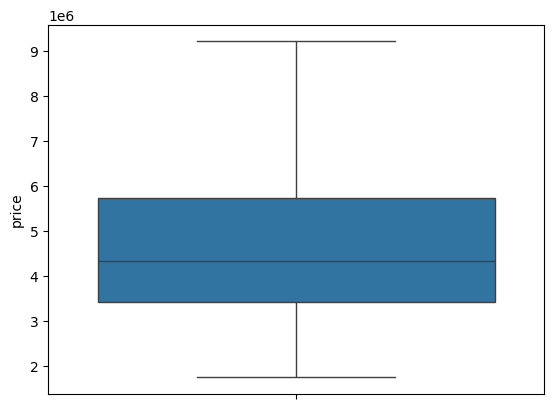

In [14]:
sns.boxplot((df['price']))

In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [16]:
df.head(2)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  9205000  7420         4          2        3      yes        no       no   
1  9205000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
df["mainroad"]=df["mainroad"].map({"yes":1,"no":0})
df["guestroom"]=df["guestroom"].map({"yes":1,"no":0})
df["basement"]=df["basement"].map({"yes":1,"no":0})
df["hotwaterheating"]=df["hotwaterheating"].map({"yes":1,"no":0})
df["airconditioning"]=df["airconditioning"].map({"yes":1,"no":0})
df["prefarea"]=df["prefarea"].map({"yes":1,"no":0})
df["furnishingstatus"]=df["furnishingstatus"].map({"furnished":1,"unfurnished":0,"semi-furnished":2})
df.head(2)

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  9205000  7420         4          2        3         1          0         0   
1  9205000  8960         4          4        4         1          0         0   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 1  
1                0                1        3         0                 1

In [19]:
df['furnishingstatus'].value_counts()

furnishingstatus
2    227
0    178
1    140
Name: count, dtype: int64

In [20]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  9205000  7420         4          2        3         1          0         0   
1  9205000  8960         4          4        4         1          0         0   
2  9205000  9960         3          2        2         1          0         1   
3  9205000  7500         4          2        2         1          0         1   
4  9205000  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 1  
1                0                1        3         0                 1  
2                0                0        2         1                 2  
3                0                1        3         1                 1  
4                0                1        2         0                 1

In [32]:
x=df.drop(["price"],axis=1)
y=df['price']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [35]:
y_lin=model_1.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_lin)

0.6814009295713395

In [36]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_lasso=lasso.predict(x_test)
r2_score(y_test,y_lasso)

0.6814000682021294

In [37]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y_ridge=ridge.predict(x_test)
r2_score(y_test,y_ridge)

0.68083869884768

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr=dtr.predict(x_test)
r2_score(y_test,y_dtr)

0.47018013580744744

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr=rfr.predict(x_test)
r2_score(y_test,y_rfr)

0.6354614872731608

<Axes: >

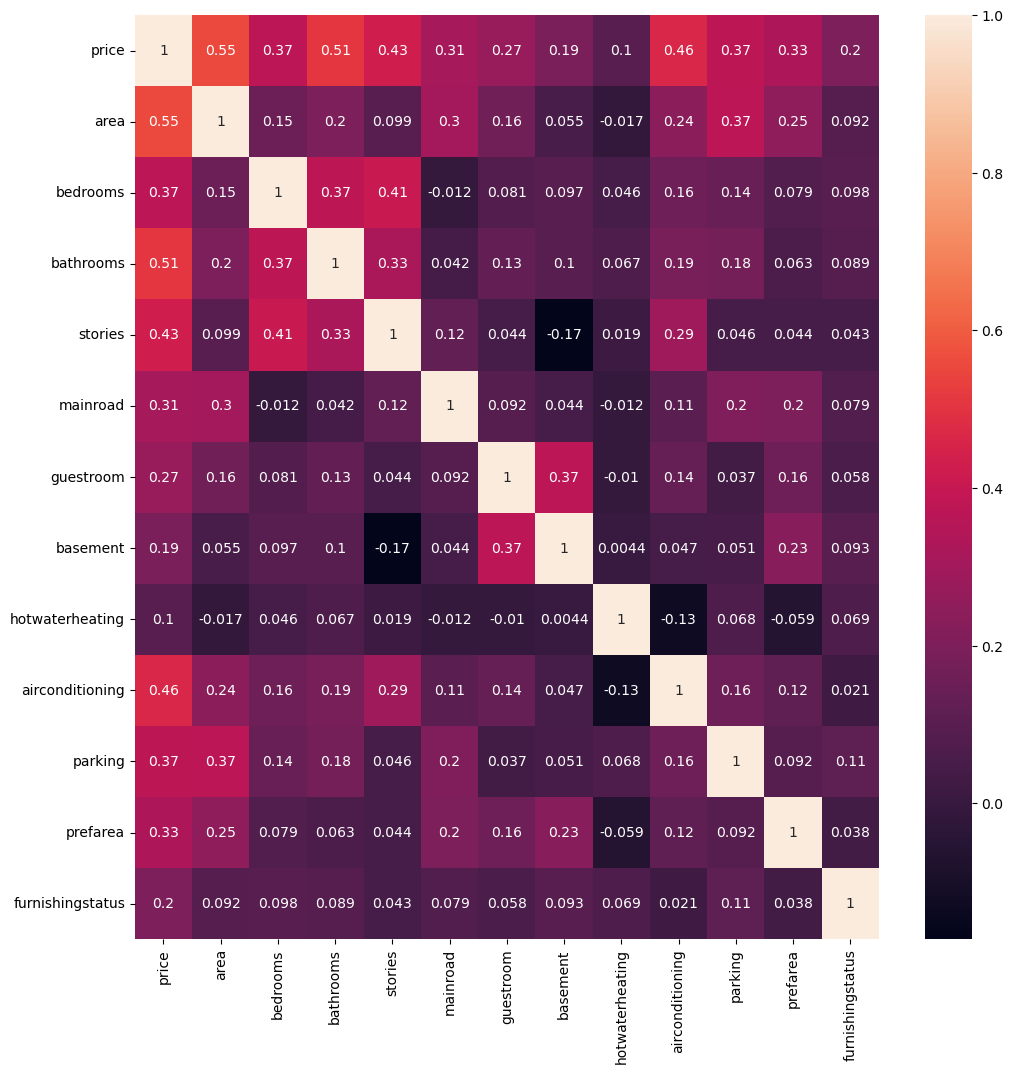

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [42]:
x

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0                1        2         1                 1  
1                  0                1        3         0                 1  
2                  0                0        2         1                 2  
3                  0                1        3         1                 1  
4                  0                1        2         0                 1  
..               ...              ...      ...       ...               ...  
540                0                0        2         0                 0  
541                0                0        0         0                 2  
542                0                0        0         0                 0  
543                0                0        0         0                 1  
544                0                0        0         0                 0  

[545 rows x 12 columns]